In [1]:
import matplotlib.pyplot as plt
import numpy as np
import SSLimPy.interface.sslimpy as sslimpy

import astropy.units as u

In [2]:
cosmodict={"h":0.67,"Omegam":0.32,"Omegab":0.04,"As":2.1e-9, "mnu":0.06}
settings = {"code":"class"}

Asslimpy = sslimpy.sslimpy(settings_dict=settings,
                           cosmopars=cosmodict)

#--------------------------------------------------#

  SSSSS   SSSSS  L       i            PPPP   y    y 
 S     S S     S L            m   m   P    P y   y  
 S       S       L     iii   m m m m  P    P  y y   
  SSSSS   SSSSS  L       i   m  m  m  PPPP     y    
       S       S L       i   m     m  P        y    
 S     S S     S L       i   m     m  P       y     
  SSSSS   SSSSS  LLLLL iiiii m     m  P      y      

#--------------------------------------------------#


In [3]:
Asslimpy.fiducialastro.dsigmaM_dM(1e9*u.Msun,1)

<Quantity -1.4123648e-10 1 / solMass>

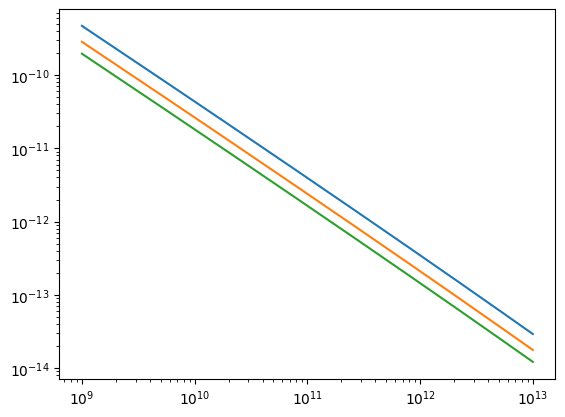

In [8]:
M = np.geomspace(1e9,1e13,200)*u.Msun
plt.loglog(M,-1*Asslimpy.fiducialastro.dsigmaM_dM(M,np.array(range(3))))

In [9]:
from SSLimPy.LIMsurvey import PowerSpectra as pobs
A = pobs.PowerSpectra(Asslimpy.fiducialcosmo,Asslimpy.fiducialastro)

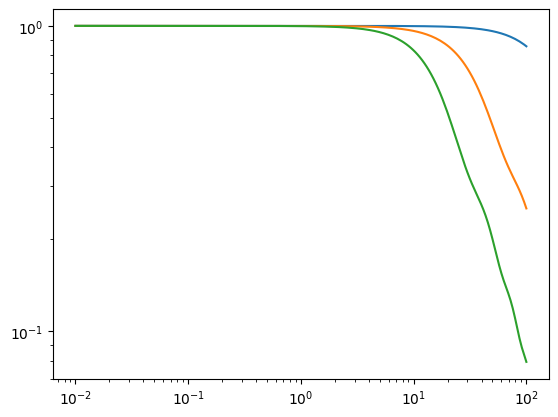

In [12]:
k = np.geomspace(1e-2,100,200) * 1/u.Mpc
plt.loglog(k,A.ft_NFW(k,np.array([1e9,1e11,1e12])*u.Msun,0))


In [11]:
A.ft_NFW(k,np.array([1e9,1e11,1e12])*u.Msun,0)

array([[0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.85739028, 0.25249741, 0.07939315],
       [0.

In [4]:
Asslimpy.fiducialcosmo.sigma8_of_z(0)

<Quantity 0.85974762>

#--------------------------------------------------#

  SSSSS   SSSSS  L       i            PPPP   y    y 
 S     S S     S L            m   m   P    P y   y  
 S       S       L     iii   m m m m  P    P  y y   
  SSSSS   SSSSS  L       i   m  m  m  PPPP     y    
       S       S L       i   m     m  P        y    
 S     S S     S L       i   m     m  P       y     
  SSSSS   SSSSS  LLLLL iiiii m     m  P      y      

#--------------------------------------------------#
#--------------------------------------------------#

  SSSSS   SSSSS  L       i            PPPP   y    y 
 S     S S     S L            m   m   P    P y   y  
 S       S       L     iii   m m m m  P    P  y y   
  SSSSS   SSSSS  L       i   m  m  m  PPPP     y    
       S       S L       i   m     m  P        y    
 S     S S     S L       i   m     m  P       y     
  SSSSS   SSSSS  LLLLL iiiii m     m  P      y      

#--------------------------------------------------#
#-----------------------------------------

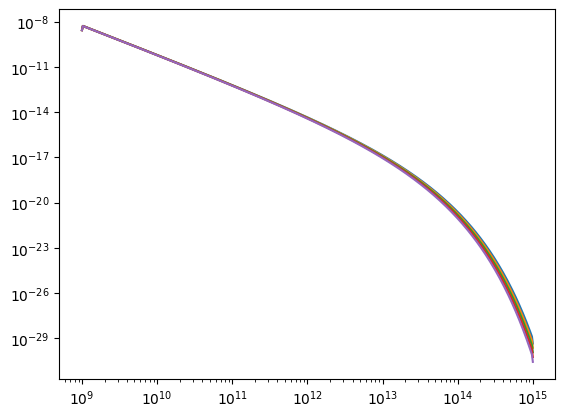

In [5]:
N =5
dn_dM = np.zeros((N,500))
mnu = (1+np.array(range(N)))*0.06

for im, mi in enumerate(mnu):
    cosmodict={"h":0.67,"Omegam":0.32,"Omegab":0.04,"As":2.1e-9, "mnu":mi}
    settings = {"code":"class"}

    Asslimpy = sslimpy.sslimpy(settings_dict=settings,
                            cosmopars=cosmodict)
    dn_dM[im,:] = Asslimpy.fiducialastro.results.dn_dM_of_M
plt.loglog(Asslimpy.fiducialastro.M,dn_dM.T)



/tmp/ipykernel_12371/438420510.py:1: UserWarning: Style includes a parameter, 'figure.max_open_warning', that is not related to style.  Ignoring this parameter.
  plt.style.use("../plot-style.txt")


ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of labels (6).

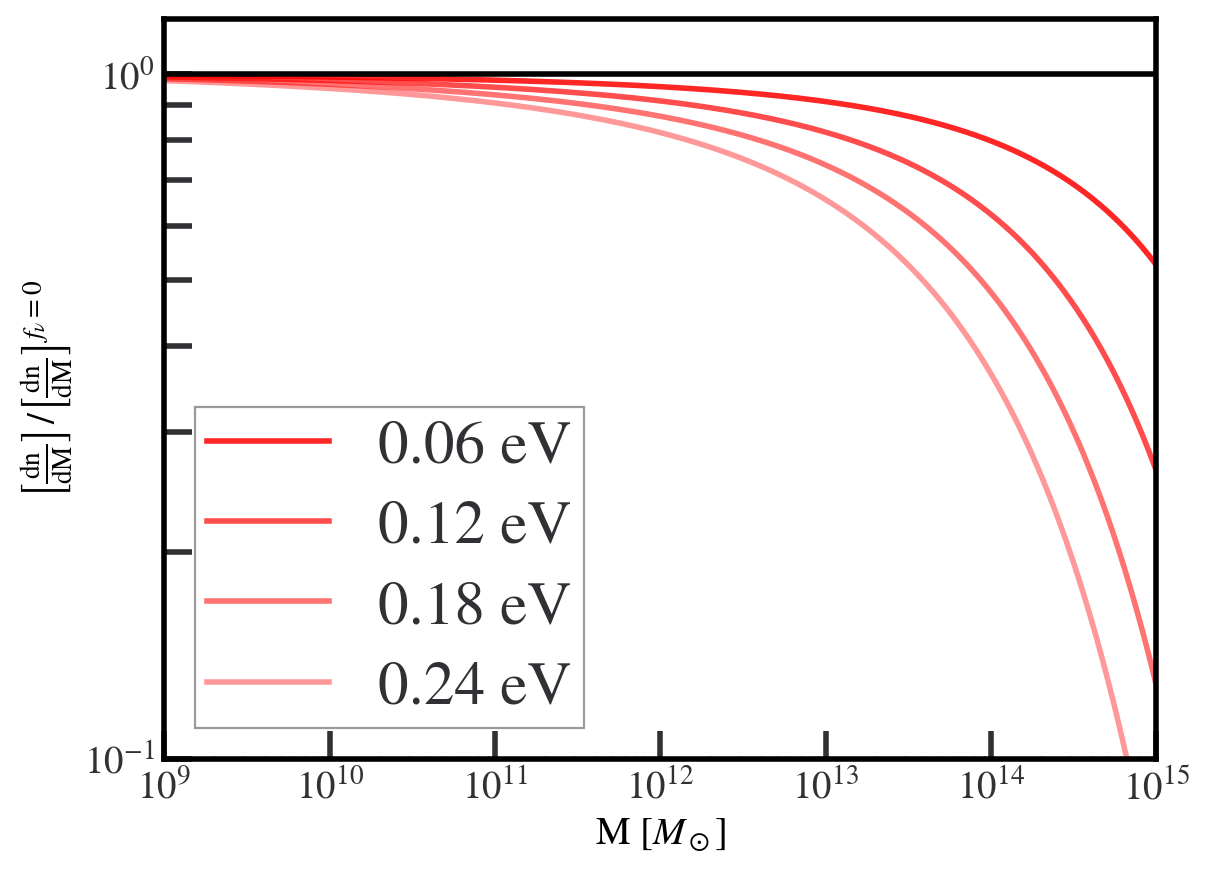

In [21]:
plt.style.use("../plot-style.txt")
M = Asslimpy.fiducialastro.M
for i in range(1,N):
    plt.loglog(M, dn_dM[i]/dn_dM[0],c="red",alpha=1-i*0.15,label="{} eV".format(i*0.06))
plt.plot(M,np.ones_like(M),c="black")
plt.xlabel("M [$M_\odot$]")
plt.legend(fontsize=22)
plt.ylabel(r"$\left[\frac{\mathrm{dn}}{\mathrm{dM}}\right]^{}/\left[\frac{\mathrm{dn}}{\mathrm{dM}}\right]^{f_\nu =0}$")
plt.ylim(1e-1,1.2)
plt.xlim(1e9,1e15)
a = np.linspace(0.1,1,10)
plt.minorticks_on()
plt.yticks(a,labels=["0.1","","","","","1"])
plt.yticks()
# plt.savefig("dn_dM_neutrinos.pdf")

In [3]:
plt.style.use("../plot-style.txt")


/tmp/ipykernel_107981/1563244562.py:1: UserWarning: Style includes a parameter, 'figure.max_open_warning', that is not related to style.  Ignoring this parameter.
  plt.style.use("../plot-style.txt")


Text(0, 0.5, '$P_{mm}(k)[\\mathrm{Mpc}^{3}]$')

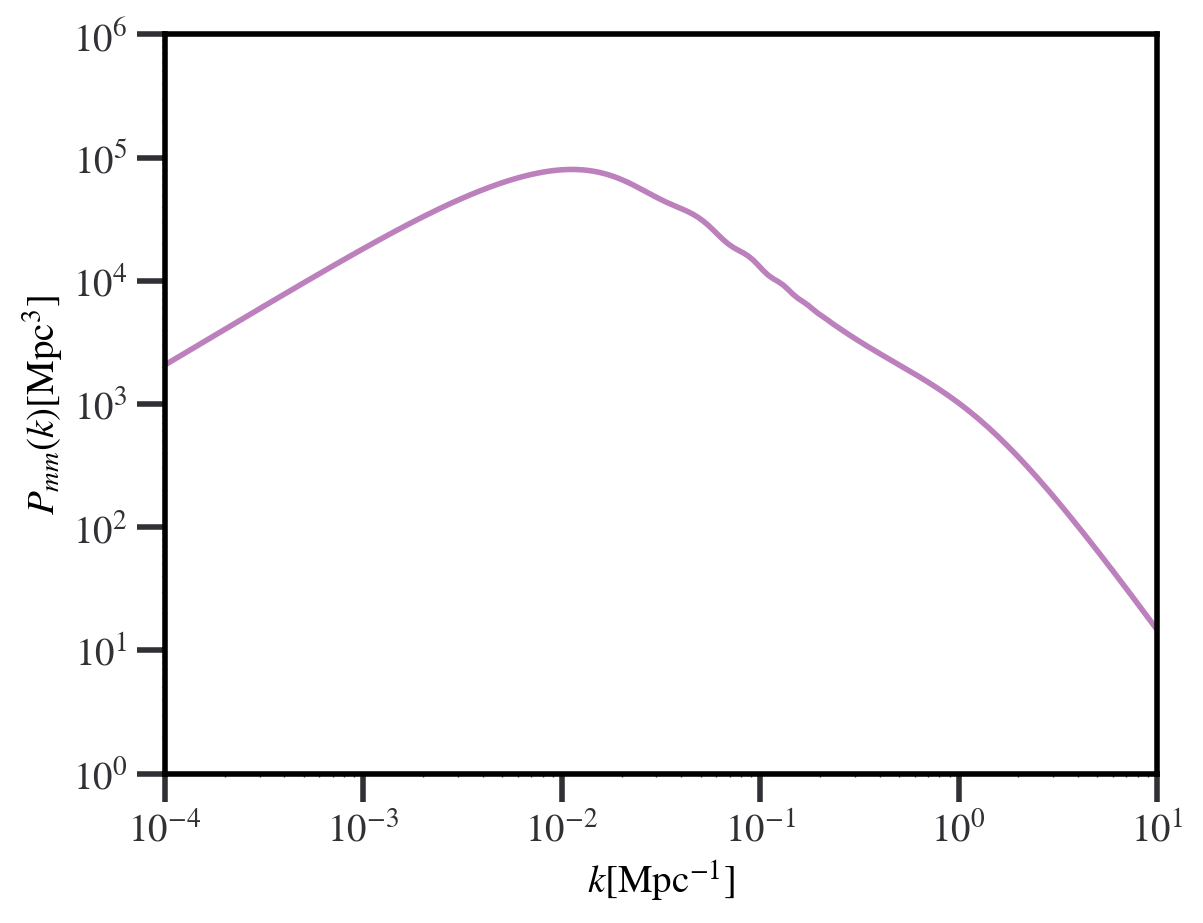

In [8]:
k = np.geomspace(1e-4,10,200)
plt.loglog(k,Asslimpy.fiducialcosmo.matpow(0,k,nonlinear=True))
plt.xlim(1e-4,10)
plt.xlabel(r"$k[\mathrm{Mpc}^{-1}]$")
plt.ylabel(r"$P_{mm}(k)[\mathrm{Mpc}^{3}]$")

In [20]:
Asslimpy.fiducialastro.M,Asslimpy.fiducialastro.results.dn_dM_of_M.shape

(<Quantity [1.00000000e+09, 1.02807322e+09, 1.05693455e+09, 1.08660611e+09,
            1.11711065e+09, 1.14847155e+09, 1.18071285e+09, 1.21385926e+09,
            1.24793621e+09, 1.28296980e+09, 1.31898690e+09, 1.35601511e+09,
            1.39408283e+09, 1.43321923e+09, 1.47345431e+09, 1.51481892e+09,
            1.55734477e+09, 1.60106446e+09, 1.64601150e+09, 1.69222035e+09,
            1.73972643e+09, 1.78856616e+09, 1.83877698e+09, 1.89039738e+09,
            1.94346693e+09, 1.99802631e+09, 2.05411735e+09, 2.11178304e+09,
            2.17106760e+09, 2.23201647e+09, 2.29467637e+09, 2.35909533e+09,
            2.42532274e+09, 2.49340937e+09, 2.56340741e+09, 2.63537052e+09,
            2.70935387e+09, 2.78541416e+09, 2.86360972e+09, 2.94400048e+09,
            3.02664806e+09, 3.11161583e+09, 3.19896892e+09, 3.28877429e+09,
            3.38110078e+09, 3.47601918e+09, 3.57360225e+09, 3.67392478e+09,
            3.77706369e+09, 3.88309805e+09, 3.99210913e+09, 4.10418050e+09,
            

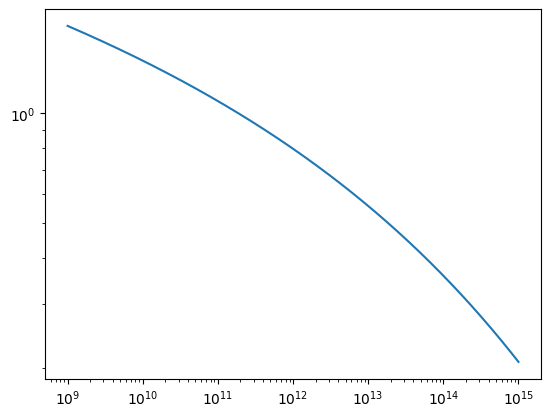

In [6]:
plt.loglog(Asslimpy.fiducialastro.M,Asslimpy.fiducialastro.results.sigmaM[:,0])


In [3]:
from SSLimPy.LIMsurvey import PowerSpectra
pobs = PowerSpectra.PowerSpectra(Asslimpy.fiducialcosmo,Asslimpy.fiducialastro)

In [4]:
pobs.prepare_c_NFW()

UnitTypeError: Can only apply 'log10' function to dimensionless quantities

In [7]:
k= np.geomspace(1e-3,1,200)
z= np.array(range(4))
M = np.geomspace(1e7*u.Msun,1e11*u.Msun)
sigma_m_z = Asslimpy.fiducialastro.sigmaM_of_z(M,z)


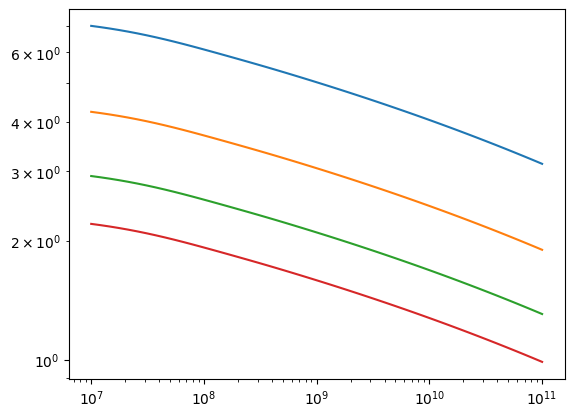

In [8]:
plt.loglog(M,sigma_m_z)

Text(0, 0.5, '$T_{cb}/T_{mm}$')

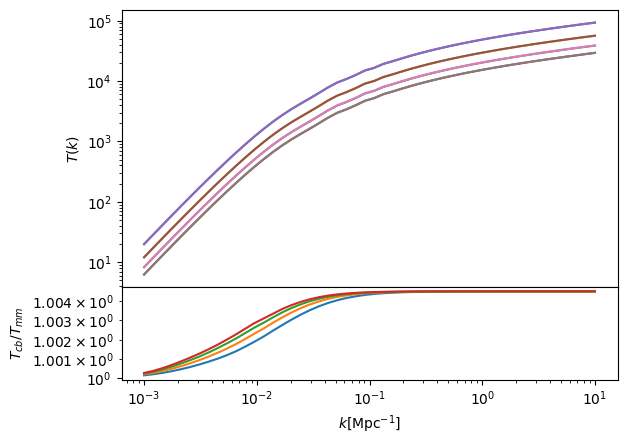

In [11]:
k= np.geomspace(1e-3,10)
fig, axs = plt.subplots(2,1,height_ratios=[3,1],sharex=True)
axs[0].loglog(k, Asslimpy.fiducialcosmo.Transfer(z,k).T)
axs[0].loglog(k, Asslimpy.fiducialcosmo.Transfer(z,k,tracer="clustering").T)
axs[1].loglog(k, Asslimpy.fiducialcosmo.Transfer(z,k,tracer="clustering").T/Asslimpy.fiducialcosmo.Transfer(z,k,tracer="matter").T)
fig.subplots_adjust(hspace=0)
axs[1].set_xlabel("$k [\mathrm{Mpc}^{-1}]$")
axs[0].set_ylabel("$T(k)$")
axs[1].set_ylabel("$T_{cb}/T_{mm}$")